# DATA PRE PROCESSING

In the initial steps we carry out the data pre processing so as to have an accurate output.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data=pd.read_csv("athlete_events.csv")
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
data.shape #[total rows,total columns]

(271116, 15)

# DATA CLEANING

Since our dataset has repeated entries for same player we delete the repeated ones.

In [4]:
import csv
from itertools import groupby

IN_FILE   = 'athlete_events.csv'
OUT_FILE  = 'athlete_updated.csv'

def main():
    with open(IN_FILE, mode='r',newline='') as inf, open(OUT_FILE, mode='w',newline='') as outf:
        incsv  = csv.reader(inf)
        outcsv = csv.writer(outf)
        # assumes data is already in sorted order
        for Name,rows in groupby(incsv, key=lambda row: row[0:2]):
            outcsv.writerow(next(rows))

if __name__=="__main__":
    main()

In [5]:
data_new=pd.read_csv('athlete_updated.csv')
data_new.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
data_new.shape

(135571, 15)

Now check for null values and get rid of them.

In [7]:
data_new.isnull().sum()

ID             0
Name           0
Sex            0
Age         6368
Height     33916
Weight     34885
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     116420
dtype: int64

In [8]:
data_new=data_new.dropna()

In [9]:
data_new.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [10]:
data_new.shape

(13507, 15)

In [11]:
data_new.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
15,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
16,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
29,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
36,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
61,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze


#  DATA VISUALIZATION

To decide which attributes have to be used for our algorithm, we need to visualize them.

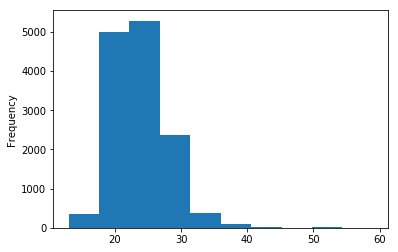

In [12]:
data_new["Age"].plot.hist()

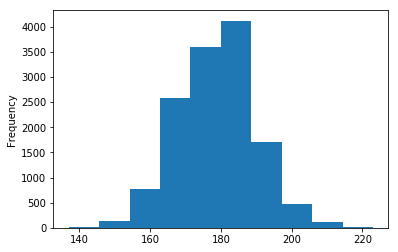

In [13]:
data_new["Height"].plot.hist()

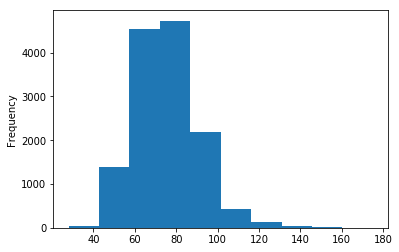

In [14]:
data_new["Weight"].plot.hist()

# DATA ANALYSIS

We choose Height and Weight as our 2 dimensions for clustering since Age is more skewed in distribution than those two.

In [15]:
summary=data_new.describe()
summary=summary.transpose()
summary.head()

,count,mean,std,min,25%,50%,75%,max
ID,13507.0,69901.670023,38895.870698,16.0,37313.5,69555.0,104007.0,135563.0
Age,13507.0,23.880358,3.994301,13.0,21.0,23.0,26.0,59.0
Height,13507.0,178.571407,10.867475,137.0,171.0,178.0,185.0,223.0
Weight,13507.0,75.387725,15.058792,28.0,65.0,74.0,85.0,175.0
Year,13507.0,1986.461538,22.530416,1896.0,1972.0,1988.0,2004.0,2016.0


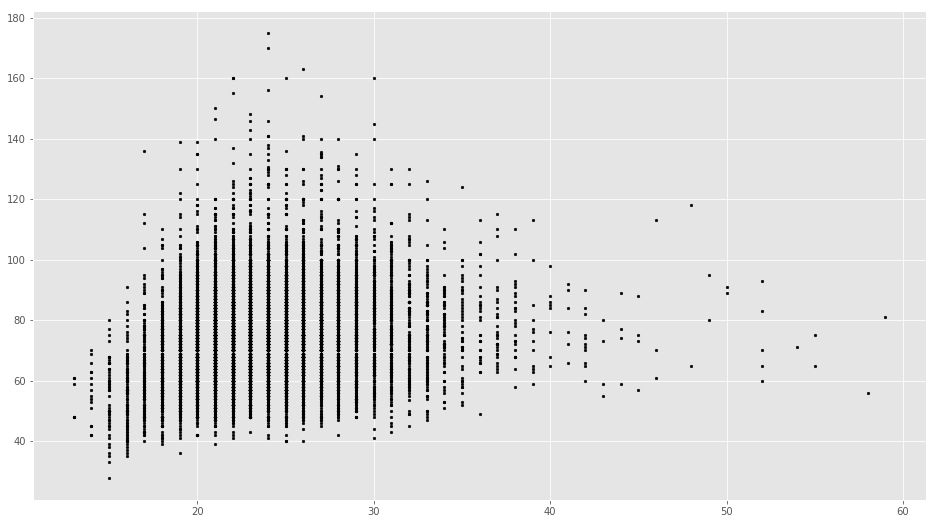

In [20]:
x=data_new.iloc[:,[3,5]].values
X = np.array(list(zip(x[:,0], x[:,1])))
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.scatter(x[:,0],x[:,1], c='black', s=7)

# REMOVING OUTLIERS USING Z-SCORE

In [21]:
from scipy import stats
x=x[(np.abs(stats.zscore(x)) < 3).all(axis=1)]

In [23]:
x.shape

(13244, 2)

# K-MEANS CLUSTERING MODEL IMPLEMENTATION

Centroids are: [[34. 78.]
 [20. 70.]]
Iteration 1 :
New Centroid for cluster 1: [25. 79.]
New Centroid for cluster 2: [19. 64.]
Iteration 2 :
New Centroid for cluster 1: [21. 80.]
New Centroid for cluster 2: [19. 64.]
Iteration 3 :
New Centroid for cluster 1: [21. 80.]
New Centroid for cluster 2: [19. 64.]
Same centroids again!


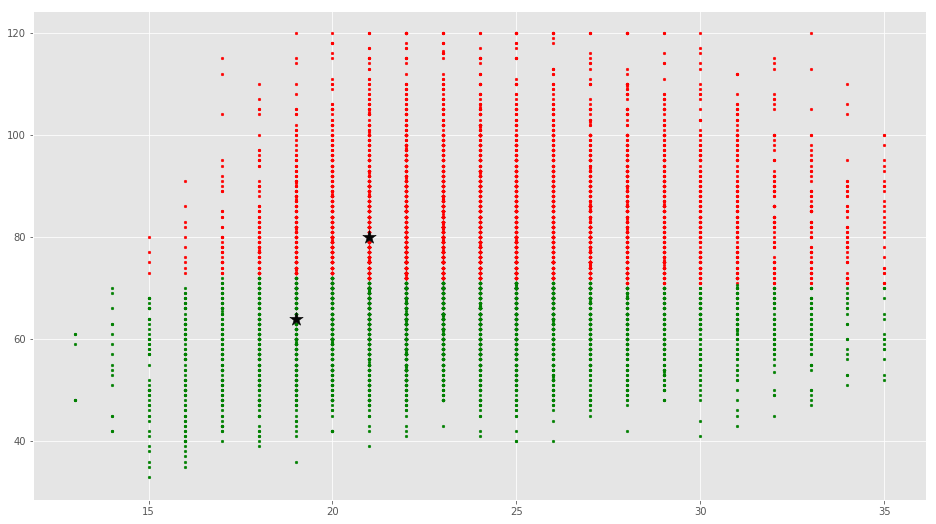

In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt

def euclidean(a,b):
	return np.linalg.norm(a-b)

def main():
    #STEP 1:Choosing random value of k centroids from the values present in dataset
    #2d array with 2 centroids from x randomly, k=2
    centroid=x[np.random.choice(x.shape[0],2, replace=False)]
    
    print("Centroids are:",centroid)
    #STEP 2:Calculate Euclidean distance for each point with centroid 1
    total=x.shape
    distance_1=np.zeros(total[0])
    distance_2=np.zeros(total[0])
    belongs_to=np.zeros(total[0])
    c_old=np.zeros(centroid.shape)
    error=euclidean(centroid,c_old)
    mean=np.zeros(centroid.shape)
    iterator=0
    while error!=0:
        print("Iteration",iterator+1,":")
        for i in range(total[0]):
            distance_1[i]=euclidean(x[i],centroid[0])
            #print("Distance of point",x[i],"with centroid 1:",distance_1[i])
            distance_2[i]=euclidean(x[i],centroid[1])
            #print("Distance of point",x[i],"with centroid 2:",distance_2[i])
            
            #STEP 3:Comparing the distances and assigning clusters
            if (distance_1[i]<distance_2[i]):
                belongs_to[i]=0
                #print("Point",x[i]," is in cluster 1.")
            if (distance_1[i]>distance_2[i]):
                belongs_to[i]=1
                #print("Point",x[i]," is in cluster 2.")
                
        #STEP 4:Taking mean and repeat
        c_old=deepcopy(centroid)
        for i in range(len(belongs_to)):
            if belongs_to[i]==0:
                mean[0][0]=np.mean(x[i][0])
                mean[0][1]=np.mean(x[i][1])
            else:
                continue
        
        print("New Centroid for cluster 1:",mean[0])
        
        for i in range(len(belongs_to)):
            if belongs_to[i]==1:
                mean[1][0]=np.mean(x[i][0])
                mean[1][1]=np.mean(x[i][1])
            else:
                continue
        
        print("New Centroid for cluster 2:",mean[1])
        centroid[0]=mean[0]
        centroid[1]=mean[1]
        error=euclidean(centroid,c_old)
        iterator+=1
        if error==0:
            print("Same centroids again!")
    
    #Plot the clustered points
    plt.rcParams['figure.figsize'] = (16, 9)
    plt.style.use('ggplot')
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    for i in range(2):
        points = np.array([x[j] for j in range(len(x)) if belongs_to[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(centroid[:, 0], centroid[:, 1], marker='*', s=200, c='#050505')
    
if __name__=="__main__":
    main()